In [2]:
import tensornetwork as tn
import numpy as np

In [10]:
A = tn.Node(np.ones([4,2]))

In [11]:
B = tn.Node(np.ones([2,2]))

In [12]:
try: 
    A[0]^B[1]
except:
    print("Cannot connect edges of unequal dimension.")

Cannot connect edges of unequal dimension.


In [13]:
A[1]^B[0]


Edge('__unnamed_node__'[1] -> '__unnamed_node__'[0] )

In [6]:
result = tn.contractors.auto([A,B], ignore_edge_order=True)

In [7]:
u_prime = tn.split_node(result)


TypeError: split_node() missing 2 required positional arguments: 'left_edges' and 'right_edges'

In [ ]:
letters = np.array([['A','B','C','D'],
        ['E','F','G','H'],
        ['I','J','K','L'],
        ['M','N','O','P']])

In [ ]:
np.reshape(letters,[2,2,2,2],order='A')

In [ ]:
m = tn.Node(np.ones([3,3,3]), name="m")
d = tn.Node(np.ones([3,3,3]), name="d")
p = tn.Node(np.ones([3,3,3]), name="p")
d[0] ^ m[0]
m[1] ^ p[0]
p[1] ^ d[1]

In [ ]:
l, r, _ = tn.split_node(m, left_edges=[m[0], m[2]], right_edges=[m[1]], left_name = "m_l", right_name="m_r")

In [80]:
l.shape

(3, 3, 2)

In [81]:
r.shape

(2, 3, 3)

In [120]:
t = tn.Node(np.ones([3,3,3,3 ]), name="o_4")

In [121]:
# This produces the right MPS for a 4-order tensor
l, r, _ = tn.split_node(t, left_edges=[t[0],t[1]], right_edges=[t[2], t[3]], max_truncation_err = 10e-20, left_name = "l",
right_name="r")
#rl, rr, _ = tn.split_node(r, left_edges=[r[0],r[1]], right_edges=[r[2]],max_singular_values = 2, left_name = "rl", right_name="rr")


In [125]:
tn.split_node(t, left_edges=[t[0],t[1]], right_edges=[t[2], t[3]], max_truncation_err = 10e-20, left_name = "l",
right_name="r")

(Node
 (
 name : 'l',
 tensor : 
 array([[[-1.],
         [-1.],
         [-1.]],
 
        [[-1.],
         [-1.],
         [-1.]],
 
        [[-1.],
         [-1.],
         [-1.]]]),
 edges : 
 [
 Edge(Dangling Edge)[0] 
 , 
 Edge(Dangling Edge)[1] 
 , 
 Edge('l'[2] -> 'r'[0] )
 ] 
 ),
 Node
 (
 name : 'r',
 tensor : 
 array([[[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.]]]),
 edges : 
 [
 Edge('l'[2] -> 'r'[0] )
 , 
 Edge(Dangling Edge)[1] 
 , 
 Edge(Dangling Edge)[2] 
 ] 
 ),
 array([0., 0., 0., 0., 0., 0., 0., 0.]))

In [93]:
def matrix_product_state(tensor, max_truncation_err):
    order = len(t.shape)
    if order <=3:
        return tensor
    
    mps = [tensor]
    else:
        for i in range(order-1):
            mps.append(tn.split_node(mps[i], left_edges=[t[0],t[1]], right_edges=[t[2], t[3]], 
                                     max_truncation_err = 10e-20, left_name = "l", right_name="r"))

(3, 3)

In [154]:
def recursor(tuple_train):
    if len(tuple_train[0].shape) > 2:
        print("Should trigger")
        return recursor(tn.split_node(tuple_train[0], left_edges=[tuple_train[0][0]], right_edges=[tuple_train[0][2], tuple_train[0][1]], 
                                     max_truncation_err = 10e-20))
    if len(tuple_train[1].shape) > 2:
        return recursor(tn.split_node(tuple_train[1], left_edges=[t[0],t[1]], right_edges=[t[2], t[3]], 
                             max_truncation_err = 10e-20))
    else:
        print('else!')
        return tuple_train

In [183]:
t = tn.Node(np.ones([3,3,3,3 ]), name="o_4")
a = tn.Node(np.ones([3,3]), name="a")
t[0]^ a[0]
test = tn.split_node(t, left_edges=[t[0],t[1]], right_edges=[t[2], t[3]], max_truncation_err = 10e-20, left_name = "l",
right_name="r")


Edge('o_4'[0] -> 'a'[0] )

[
 Edge('o_4'[0] -> 'a'[0] ),
 
 Edge(Dangling Edge)[1] ]

In [187]:
test = tn.split_node(t, left_edges=[t[0],t[1]], right_edges=[t[2], t[3]], max_truncation_err = 10e-20, left_name = "l",
right_name="r")

[
 Edge('l'[0] -> 'a'[0] ),
 
 Edge(Dangling Edge)[1] ,
 
 Edge('l'[2] -> 'r'[0] )]

In [170]:
test[0][0]^ a[0]
test[0].edges

[
 Edge('l'[0] -> 'a'[0] ),
 
 Edge(Dangling Edge)[1] ,
 
 Edge('l'[2] -> 'r'[0] )]

In [176]:
test

(Node
 (
 name : 'l',
 tensor : 
 array([[[-1.],
         [-1.],
         [-1.]],
 
        [[-1.],
         [-1.],
         [-1.]],
 
        [[-1.],
         [-1.],
         [-1.]]]),
 edges : 
 [
 Edge('l'[0] -> 'a'[0] )
 , 
 Edge(Dangling Edge)[1] 
 , 
 Edge('l'[2] -> 'r'[0] )
 ] 
 ),
 Node
 (
 name : 'r',
 tensor : 
 array([[[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.]]]),
 edges : 
 [
 Edge('l'[2] -> 'r'[0] )
 , 
 Edge(Dangling Edge)[1] 
 , 
 Edge(Dangling Edge)[2] 
 ] 
 ),
 array([0., 0., 0., 0., 0., 0., 0., 0.]))

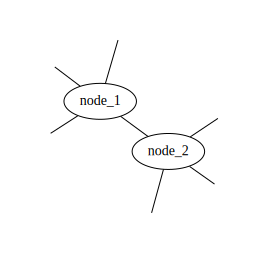

In [4]:
U = np.ones([4,4])
T_U = U.reshape([2,2,2,2], order='A')

node1 = tn.Node(T_U, name="node_1")
node2 = tn.Node(T_U, name="node_2")
node1[0]^node2[1] # Connecting edges

tn.to_graphviz([node1,node2]) # Plot the network

In [ ]:
node